<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg">
<center>
<p>
<h1>Algorítmica Avanzada</h1>
<h2>Problemas 2 - Greedy </h2>
</center>
</p>
</div>

<div style="width:90%; margin:0 auto;">
  <h2><p>Minimum Spanning Tree</p></h2>
  <p>
Dado un grafo conexo y no dirigido, un spanning tree de ese grafo es un subgrafo que tiene que ser un árbol (sin ciclos) y contener todos los vértices del grafo inicial. Cada arista tiene asignado un peso, que es un número representativo de algún objeto, distancia, etc. y se usa para asignar un peso total al MST computando la suma de todos los pesos de las aristas del árbol en cuestión. Un MST o minimum spanning tree es un árbol recubridor que pesa menos o igual que caulquier otro árbol recubridor de ese grafo. Todo grafo tiene un bosque recubridor mínimo.
  </p>
<img width="300px" src="img/mst.png">
  </div>



<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>1- Kruskal Algorithm</p></h2>
  El algoritmo de Kruskal es un algoritmo voraz que calcula el MST de un grafo dado. Se basa en ir añadiendo a cada paso la arista más pequeña del grafo que conecte dos subárboles que no estaban previamente conectados.
    
   <center><img width="250px" src="./img/KruskalDemo.gif"></center>

<p>
En este apartado tendréis que implementar el algoritmo de Kruskal para obtener el Minimum Spanning Tree de cualquier grafo no dirigido. 
  </p>


In [230]:
# Imports
import networkx as nx
import random

In [231]:
#Funcio per trobar el segNode
def find(parent, i): 
        if parent[i] == i: 
            return i 
        return find(parent, parent[i]) 

def kruskal(G):
    """ Implementación del algoritmo de Kruskal para obtener el MST de un grafo cualquiera.
    Args:
        G (nx.Graph): El grafo de tipo nx.Graph sobre el que queremos obtener el MST. 
                      Las aristas tienen el atributo 'weight' que indica su peso.
    Returns:
        tree (nx.Graph): El grafo de tipo nx.Graph que contiene el arbol de expansión mínima.
        weight (float/int): El peso total del grafo tree.
    """
    #Inicialitzem variables de l'arbre, pes, pares del node i rang
    tree = nx.Graph()
    total_weight = 0 
    visitat = []
    parent = []
    edgesTotals = 0 #Index per anar incrementant edges visitats.
    total = 0 #Index per anar incrementant el resultat i sortir del bucle quan s'han visitat tots els nodes
    
    #Ordenem el edges en ordre creixent segons el seu pes
    edges=sorted(G.edges(data=True), key=lambda t: t[2].get('weight', 1))
    

        
    #Bucle per poder explorar tots els nodes
    while total< len(G.nodes())-1:
        #Agafem el edge menor amb els seus nodes de sortida i entrada
        nodeOut,nodeIn,pes = edges[edgesTotals]
        edgesTotals=edgesTotals+ 1 #Incrementem en 1 els edges visitats
        nodeOutSeg = find(parent, nodeOut) #Busquem el seguent node de sortida
        nodeInSeg = find(parent, nodeIn) #Busquem el seguent node de entrada.
        #Si no formen cicle entrara al if
        if nodeOutSeg != nodeInSeg: 
            total_weight = total_weight + pes.get('weight') #Incrementem el pes total
            total= total + 1 #Incrementem en 1 els nodes visitats
            tree.add_edge(nodeOut,nodeIn) #Afegim els nodes al tree
    
    # Implement Kruskal algorithm here
    return tree, total_weight


<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>2- Prim Algorithm</p></h2>
  Igual que Kruskal, el algoritmo de Prim es un algoritmo voraz que calcula el MST de un grafo dado. La diferencia fundamental es en el orden en que se añaden aristas. Prim empieza en un nodo concreto y se basa en ir añadiendo a cada paso la arista más pequeña de entre las que conectan los nodos ya pertenecientes al árbol con sus vecinos.
    
   <center><img width="250px" src="./img/PrimDemo.gif"></center>

<p>
En este apartado tendréis que implementar el algoritmo de Prim para obtener el Minimum Spanning Tree de cualquier grafo no dirigido y conexo. 
  </p>


In [232]:
def prim(G,origen=None,infinity=float('inf')):
    """ Implementación del algoritmo de Kruskal para obtener el MST de un grafo cualquiera.
    Args:
        G (nx.Graph): El grafo sobre el que queremos obtener el MST. 
                      Las aristas tienen el atributo 'weight' que indica su peso.
        origin (node_id): Opcional, nodo por el cual comenzar la búsqueda.
        infinity (float): Opcional, valor para inicializar las distancias.
    Returns:
        tree (nx.Graph): El grafo que contiene el arbol de expansión mínima.
        weight (float/int): El peso total del grafo tree.
    """
    #Inicialitzem l'arbre i variables
    tree = nx.Graph()
    total_weight = 0
    visitat = []
    #Comprovem si tenim un parametre d'origen o no
    if origen:
        nodeActual = origen
    else:#En cas que no hi hagui fem un random de tots els nodes
        nodeActual = random.choice(list(G.nodes()))
    #Guardem en una priorQueue totes les arestes del node origen, aixi agafant el pes minim.
    priorQueue = [[G[nodeActual][nei]['weight'],(nodeActual, nei)] for nei in G.neighbors(nodeActual)]

    #Afegim al arbre el node actual(origen)
    tree.add_node(nodeActual)
    for i in G.node[nodeActual] : #Cambian els nodes
        tree.node[nodeActual][i] =G.node[nodeActual][i]
        
    #Afegim el node actual(origen) a la llista de visitats
    visitat.append(nodeActual)
    
    #Fins que no haguem visitats tots no surt del bucle
    while len(visitat) < len(G.nodes): 
        #L'aresta actual sera la minima que tenim a la priorQueue
        arestaActual = min(priorQueue)
        #Sumem el pes de l'aresta que afegirem
        total_weight += arestaActual[0]
        #Extrayem l'aresta minima de la priorQueue
        priorQueue.remove(arestaActual)
        #Canviem el node actual
        nodeActual = arestaActual[1][1]
        #Iterem pels veins per trobar aquells que no han estat visitats y evitar cicles i els afegim a la llista de 
        #veins no visitats
        neiNoVisitat = [nei for nei in G.neighbors(nodeActual) if nei not in visitat]

        
        #Iterem pels veins no visitats per afegir a la priorQueue els nodes que no hem pasat
        for node in neiNoVisitat:
            priorQueue.append([G[nodeActual][node]["weight"], (nodeActual, node)])
            
        #Si no s'han trobat cicles
        if nodeActual not in visitat:
            #Afegim l'aresta al tree juntament amb els nodes.
            tree.add_edge(arestaActual[1][0], arestaActual[1][1], weight= arestaActual[0])
            #Afegim a la llista de visitats el nodeActual            
            visitat.append(nodeActual)

    # Implement Prim algorithm here
    return tree, total_weight

<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Tests </h3></p> </center>
<p>
Realiza los tests pertinentes en las celdas dispuestas a continuación.
</p>
</div>


TOTAL MST WEIGHT
NX MST  18
Kruskal 18
Prim    18


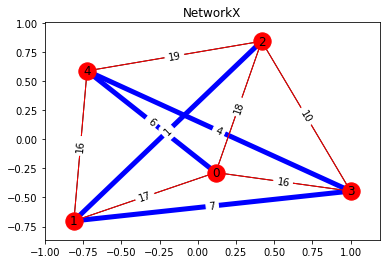

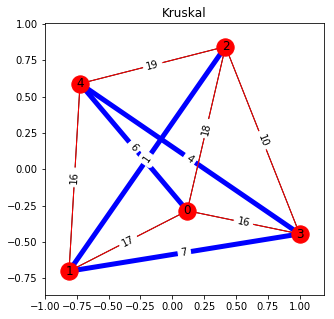

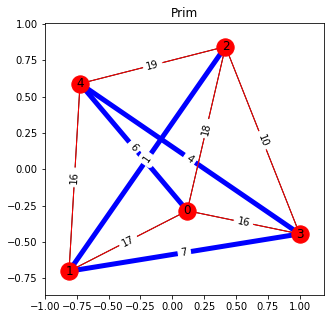

In [233]:
%matplotlib inline
from utils import *

# Create random Graph
num_v = 5 # Num nodes
num_e = 15 # Num edges
G = generate_random_graph(num_v,num_e)

# Run test
test_algs(G,kruskal,prim,0) # 0 for both, 1 for kruskal only, 2 for prim only

<div class="alert alert-warning">
<h1>Pregunta 1</h1>
<p><strong>
Explica las diferencias entre los algoritmos de Kruskal y Prim. ¿Para qué casos (características concretas de un grafo) es uno más eficiente que el otro?
</strong></p>
</div>

### _ La principal diferencia entre els dos algoritmes es basa en com es cerquen els camins mes curts. _ 
### _ Per Kruskal es comprovaran quines son les arestes amb menys pes, independentment d'un ordre als nodes. Es a dir, anira agafant les arestes amb menys pes fins a les de mes pes, sempre sense formar cicles entre els nodes de les arestes que agafa, aixi formant l'abre final. _
### _ Per Prim inicialment es començara en un node, ja sigui donat per nosaltres o aleatori i a partir d'aquest anira buscant les arestes amb menys pes i anant als nodes que els conecten, igualment sense arribar a formar cicles. _

<div class="alert alert-warning">
<h1>Pregunta 2</h1>
<p><strong>
Explica tu implementación y analiza la complejidad de ambos algoritmos.
</strong></p>
</div>

### _ Inicialitzarem l'arbre i les variables que necesitarem, posteriorment comprovarem si al cridar a la funcio li hem pasat un node origen, en cas que no li haguem pasat un li asignarem un aleatori. Guardarem en una priorityQueue totes les arestes que estan relacionades amb el node origen.  Afegirem el node origen tant al tree que retornarem com a la llista de nodes visitats per aixi posteriorment asegurar-nos de que no es produeixen cicles._

### _ Començem el bucle que no acabara fins que haguem visitats tants nodes com la cardinalitat del graf. Començarem agafant el minim pes de la priorQueue que hem creat abans, li sumarem al comptador el pes que hem agafat i l'extreurem de la priorQueue. Posteriorment canviarem el node actual e iterarem pels veins per trobar aquells no visitats i que no es formin cicles.   _

### _ Finalment iterarem per aquells no visitats per afegir-los a la priorQueue i tornar a fer el proces amb el nou node. A la vegada anirem afegint les arestes a l'abre i la llista de visitats als nodes seleccionats. _




<div class="alert alert-info">
<center>
  <h1>Entrega</h1>
</center>
<p>
La entrega de esta práctica se podrá realizar en el campus virtual hasta el día <b>17 de Noviembre a las 23:55</b>. En la tarea que se habilitará en el campus deberéis colgar <b>únicamente este notebook</b> con el nombre:
</p>
<p>
```
[grupo]_[apellido]_[nombre]_2-Greedy.ipynb
```

</p>
<p>
    Por ejemplo, para un alumno llamado <i>Nombre Genérico</i> perteneciente al <i>grupo Z</i> el nombre del archivo debería ser:
</p>
<p>
```
Z_Generico_Nombre_2-Greedy.ipynb
```

Y <b>NO</b>:
<ul>
<li>Z00_Generico_Nombre_2-Greedy.zip</li>
    
<li>ZX_Generico_Nombre_2-Greedy.ipynb</li>

<li>Lab2_Generico_Nombre_2-Greedy.rar</li>

<li>2-Greedy.ipynb</li>
<li> ... literalmente cualquier otra cosa que no sea el nombre que sí hay que ponerle </li>
</ul>
</p>
<p>

Es muy importante que en el notebook exista <b> una sola función </b> con el nombre <i>kruskal</i> y <i>prim</i> ya que emplearemos un corrector automático para agilizar el proceso. Podéis tener tantas funciones auxiliares como queráis, pero no puede haber dos funciones con el mismo nombre. No os preocupéis si no os funciona del todo, el no pasar los tests no significa necesariamente que tengáis un 0 en la práctica; también revisaremos manualmente el código así como los comentarios del final del notebook y vuestro análisis de complejidad.


Es fundamental que el código esté bién comentado y con un análisis de complejidad exhaustivo del algoritmo. La importancia de poner nombre correcto al archivo debería ser directamente proporcional a lo contentos que queráis que los profesores de prácticas corrijan.<b> No adherirse al formato en el nombre del archivo así como entregar otro tipo de archivo o varios archivos, conllevará a la no corrección de vuestra práctica.</b>
</p>
</div>